## BLM19432E Introduction to Data Science Midterm

---

### Deadline: 23.04.2024: 06:00 pm

---

**Important Notes:** Change this file name to **studentd_Midterm.ipynb**


---

### Name Surname: Ahmet Emir Kalafat

### StudentID: 2021241007

---


---

## To earn points, you must provide detailed explanations and comments for each step!!!

#### Note: "If there are no missing (NULL) values in the dataset, delete 20% of each feature and then continue your work."

---


In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

In [89]:
fileDir = "../midterm_exam/Variant I.csv"  # dosyanın yolu
#https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022

df = pd.read_csv(fileDir)  # dosyayı bir DataFrame'e atıyoruz
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.560867,0.290389,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.494652,0.288847,5.024707e-08,0.226846,0.492220,0.755838,1.000000
prev_address_months_count,1000000.0,16.960120,43.870653,-1.000000e+00,-1.000000,-1.000000,15.000000,399.000000
current_address_months_count,1000000.0,83.585392,86.458280,-1.000000e+00,18.000000,50.000000,124.000000,429.000000
customer_age,1000000.0,31.974200,10.897167,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.051720,5.462110,1.373749e-08,0.007151,0.015104,0.026185,76.635022
intended_balcon_amount,1000000.0,8.715090,20.210541,-1.573989e+01,-1.180401,-0.828224,6.215877,113.120051
zip_count_4w,1000000.0,1574.468789,1003.700453,1.000000e+00,893.000000,1270.000000,1952.000000,6678.000000
velocity_6h,1000000.0,5661.914760,3010.869604,-1.741097e+02,3431.170414,5299.991908,7692.312342,16817.838935


In [90]:
# Her sütunda NaN değerlerin sayısını hesaplayalım
nan_counts = df.isnull().sum()

print(nan_counts)

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

- Veri setinde hiç boş değerlerin olmadığını görüyoruz.
- Bu yüzden %20'sini kendimiz elimizle sileceğiz.
- ama rastgele olmasına dikkat ediyoruz.


In [91]:
# şimdilik esas veri setimizi kopyalayalım
df_withNan = df.copy()

# DataFrame'deki toplam hücre sayısını hesapla
total_cells = np.product(df_withNan.shape)

# Silinecek hücre sayısı (%20)
cells_to_remove = int(total_cells * 0.2)

# Rastgele hücre indekslerini seç
np.random.seed(0)  # Rastgelelik için seed ayarı
indices = np.random.choice(df_withNan.size, cells_to_remove, replace=False)

# İndeksleri DataFrame'in i ve j koordinatlarına dönüştür
row_indices, col_indices = np.unravel_index(indices, df_withNan.shape)

# Seçilen hücreleri NaN ile değiştir
for row, col in zip(row_indices, col_indices):
    df_withNan.iat[row, col] = np.nan

print("df için null değer miktarı\n", df.isnull().sum())
print("**********************************")
print("df_withNan için null değer miktarı\n", df_withNan.isnull().sum())

df için null değer miktarı
 fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                

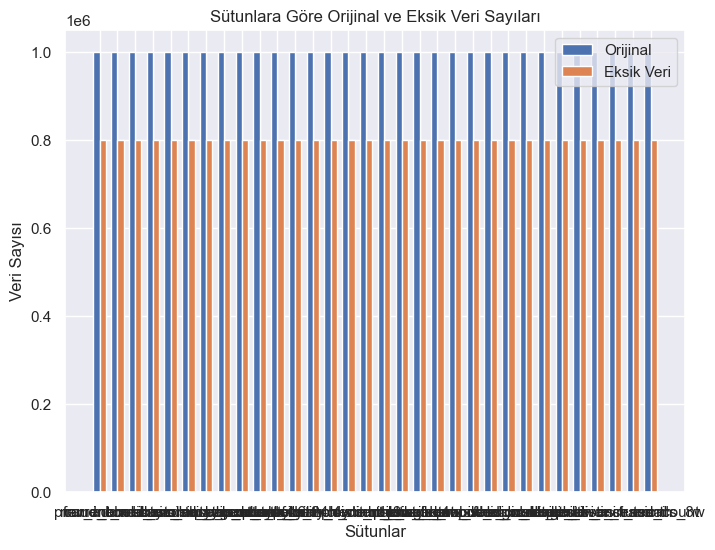

In [92]:
# Eksik veri öncesi ve sonrası sayıların hesaplanması
original_counts = df.count()
missing_counts = df_withNan.count()

# Bar grafiğini çiz
fig, ax = plt.subplots(figsize=(8, 6))
index = np.arange(len(original_counts))
bar_width = 0.35

original_bars = ax.bar(index, original_counts, bar_width, label="Orijinal")
missing_bars = ax.bar(index + bar_width, missing_counts, bar_width, label="Eksik Veri")

ax.set_xlabel("Sütunlar")
ax.set_ylabel("Veri Sayısı")
ax.set_title("Sütunlara Göre Orijinal ve Eksik Veri Sayıları")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(original_counts.index)
ax.legend()

plt.show()

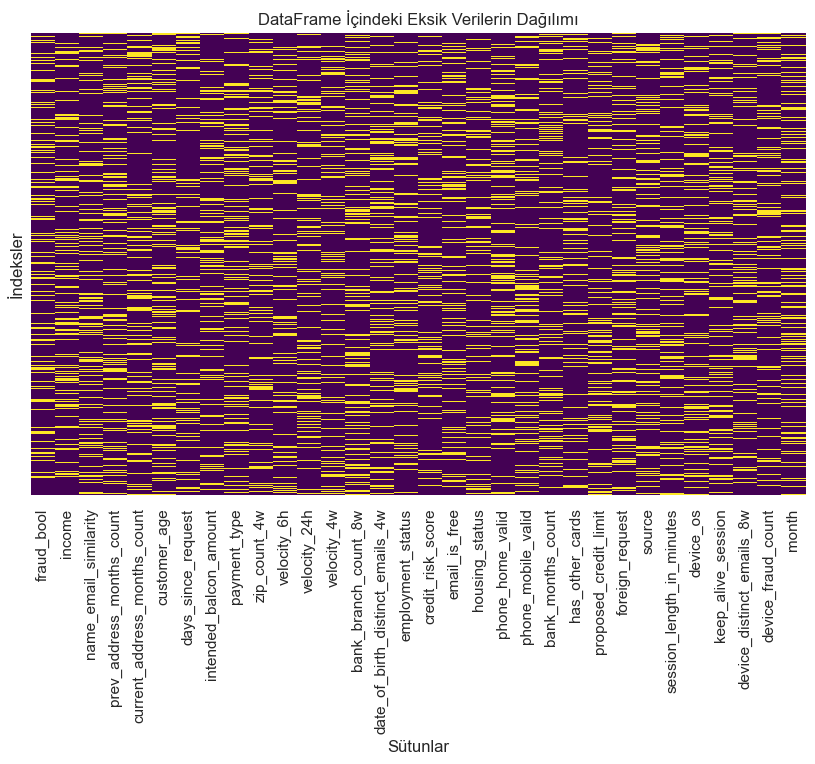

In [93]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_withNan.isnull(), cbar=False, yticklabels=False, cmap="viridis")
plt.title("DataFrame İçindeki Eksik Verilerin Dağılımı")
plt.xlabel("Sütunlar")
plt.ylabel("İndeksler")
plt.show()

- heatmap ve barplot ile de görebildiğimiz üzere rastgele olacak şekilde bütün stunlardan verileri silme işlemini tamamlamış olduk.

- şimdi elde ettiğimiz eksikleri olan verisetimiz ile işlemlere devam edebiliriz.


### Part 1. Dataset and features description

- a) **Motivation:** What problem are you tackling?
- b) **Dataset:** Explain your da and features.tt?


Motivasyon:
NeurIPS 2022'de tanıtılan Banka Hesabı Sahtekarlığı (BAF) veri setleri, yapay zeka ve özellikle makine öğrenimi metodolojilerinin etkinliğini değerlendirebilmek için titizlikle hazırlanmıştır. Bu veri setleri, altı farklı sentetik banka hesabı dolandırıcılığı senaryosunu kapsayan geniş çaplı veri koleksiyonlarından oluşmakta olup, sahtekarlık tespiti ve önleme süreçlerinde yenilikçi stratejiler geliştirmek ve mevcut sistemleri iyileştirmek amacıyla kritik bir kaynak olarak hizmet vermektedir. Ek olarak, bu veri setleri, adil makine öğrenimi alanında çalışmalar yürüten araştırmacılara, modellerin çeşitli demografik gruplar üzerindeki etkilerini inceleyerek adil sonuçlar sağlamak için benzersiz bir fırsat sunmaktadır.

1. **fraud_bool**: İşlemin sahtekarlık olup olmadığını gösteren ikili bir gösterge (0 sahtekarlık değil, 1 sahtekarlık).
2. **income**: Müşterinin gelir miktarı.
3. **name_email_similarity**: Müşterinin adı ile e-posta adresi arasındaki benzerlik oranı.
4. **prev_address_months_count**: Müşterinin önceki adresinde geçirdiği ay sayısı.
5. **current_address_months_count**: Müşterinin mevcut adresinde geçirdiği ay sayısı.
6. **customer_age**: Müşterinin yaşı.
7. **days_since_request**: Müşterinin son talebinden bu yana geçen gün sayısı.
8. **intended_balcon_amount**: Belirlenen kredi veya borç miktarı.
9. **payment_type**: Ödeme tipi (örneğin, kredi kartı, banka havalesi).
10. **zip_count_4w**: Son dört hafta içinde aynı posta kodu ile yapılan işlem sayısı.
11. **velocity_6h**: Son altı saat içindeki işlem sayısı.
12. **velocity_24h**: Son yirmi dört saat içindeki işlem sayısı.
13. **velocity_4w**: Son dört hafta içindeki işlem sayısı.
14. **bank_branch_count_8w**: Son sekiz hafta içinde kullanıcının banka şubelerinde gerçekleştirdiği işlem sayısı.
15. **date_of_birth_distinct_emails_4w**: Son dört hafta içinde, farklı e-posta adresleriyle ilişkilendirilmiş doğum tarihlerinin sayısı.
16. **employment_status**: Müşterinin istihdam durumu.
17. **credit_risk_score**: Kredi risk skoru.
18. **email_is_free**: E-posta adresinin ücretsiz bir servis sağlayıcıdan (örneğin Gmail, Yahoo) olup olmadığı.
19. **housing_status**: Müşterinin konut durumu (örneğin kiralık, mülk).
20. **phone_home_valid**: Ev telefonunun geçerliliği.
21. **phone_mobile_valid**: Mobil telefonun geçerliliği.
22. **bank_months_count**: Müşterinin bankadaki hesap açılış süresi (ay olarak).
23. **has_other_cards**: Müşterinin başka kredi kartları olup olmadığı.
24. **proposed_credit_limit**: Önerilen kredi limiti.
25. **foreign_request**: İşlemin yabancı bir ülkeden yapıldığının göstergesi.
26. **source**: İşlemin kaynağı (örneğin, online, şube içi).
27. **session_length_in_minutes**: İşlem oturumunun süresi (dakika olarak).
28. **device_os**: Cihazın işletim sistemi.
29. **keep_alive_session**: Oturumun sürekli aktif tutulup tutulmadığı.
30. **device_distinct_emails_8w**: Son sekiz hafta içinde cihazla ilişkilendirilen benzersiz e-posta adresleri.
31. **device_fraud_count**: Cihaz üzerinden yapılan sahtekarlık sayısı.
32. **month**: İşlemin yapıldığı ay.


### Part 2. Exploratory data analysis (EDA)

- a) Explain the shape of the dataset
- b) Explain the features types in the dataset. Explain in detail if there are any problems
- c) Perfrom all additional EDA steps that you consider necessary.


In [94]:
# İlk aşamada %20'si boşaltılmış olan verisetimizi df_withNan adıyla kaydetmiştik.
# kodun devamında bu veriseti üzerinde işlem yapacağız.
# anlaşılması kolay olması için df_withNan adını df olarak değiştirelim.
df = df_withNan

In [95]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,NaN,0.9,0.990415,11.0,4.0,40.0,NaN,-0.897718,NaN,1853.0,...,0.0,200.0,0.0,NaN,6.150317,NaN,0.0,NaN,0.0,0.0
1,0.0,NaN,0.781728,-1.0,151.0,30.0,0.013269,11.501507,AA,5447.0,...,0.0,1500.0,0.0,INTERNET,4.521952,windows,NaN,1.0,0.0,0.0
2,NaN,0.7,NaN,NaN,92.0,20.0,0.010669,NaN,AA,2312.0,...,NaN,200.0,0.0,INTERNET,8.361707,NaN,NaN,NaN,0.0,NaN
3,NaN,0.9,0.722684,-1.0,55.0,NaN,NaN,NaN,NaN,2413.0,...,0.0,1500.0,0.0,INTERNET,NaN,other,0.0,1.0,0.0,0.0
4,0.0,NaN,0.121661,-1.0,51.0,NaN,0.021491,-1.602116,AB,1227.0,...,0.0,1500.0,0.0,INTERNET,4.338063,other,0.0,NaN,0.0,NaN


In [96]:
df.dtypes

fraud_bool                          float64
income                              float64
name_email_similarity               float64
prev_address_months_count           float64
current_address_months_count        float64
customer_age                        float64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                        float64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                float64
date_of_birth_distinct_emails_4w    float64
employment_status                    object
credit_risk_score                   float64
email_is_free                       float64
housing_status                       object
phone_home_valid                    float64
phone_mobile_valid                  float64
bank_months_count                   float64
has_other_cards                 

In [97]:
# DataFrame'deki data tiplerini inceledikten sonra object olanları işimize yarayıp yaramayacağını konusunda incelememiz gerekiyor.
# Öncelikle object olan sütunları inceleyelim.
df.select_dtypes(include=["object"]).head()

,payment_type,employment_status,housing_status,source,device_os
0,NaN,CA,BC,NaN,NaN
1,AA,CA,BB,INTERNET,windows
2,AA,CA,BC,INTERNET,NaN
3,NaN,CA,BD,INTERNET,other
4,AB,CA,BE,INTERNET,other


In [98]:
# obje tipindeki her bir satırın kaç farklı değere sahip olduğunu inceleyelim.
for i in df.select_dtypes(include=["object"]).columns:
    print(i, ":", df[i].nunique())

print("\n***********************\n")
# her bir unique değerin ne olduğunu liste olarak yazdıralım.
object_columns = df.select_dtypes(include=["object"])
# Her bir object sütun için benzersiz değerler ve sayıları
for column in object_columns:
    print(f"Sütun: {column}")
    print(object_columns[column].value_counts())
    print("\n")

payment_type : 5
employment_status : 7
housing_status : 7
source : 2
device_os : 5

***********************

Sütun: payment_type
payment_type
AB    291751
AA    208353
AC    202380
AD     96719
AE       191
Name: count, dtype: int64


Sütun: employment_status
employment_status
CA    593792
CB    110008
CF     34834
CD     20904
CC     20741
CE     18846
CG       358
Name: count, dtype: int64


Sütun: housing_status
housing_status
BC    304016
BB    202784
BE    143940
BA    125932
BD     21011
BF      1301
BG       222
Name: count, dtype: int64


Sütun: source
source
INTERNET    794899
TELEAPP       5377
Name: count, dtype: int64


Sütun: device_os
device_os
other        281916
linux        264171
windows      204520
macintosh     43899
x11            5606
Name: count, dtype: int64




In [99]:
# Source featureunda sadece 1 farklı değer olduğu için bu featureyi true false şekline çevirebiliriz.
df["is_source_internet"] = df["source"].apply(
    lambda x: 1 if x == "INTERNET" else (0 if x == "TELEAPP" else x)
)
# source feature silinebilir
df.drop("source", axis=1, inplace=True)
df.head(5)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,is_source_internet
0,NaN,0.9,0.990415,11.0,4.0,40.0,NaN,-0.897718,NaN,1853.0,...,0.0,200.0,0.0,6.150317,NaN,0.0,NaN,0.0,0.0,NaN
1,0.0,NaN,0.781728,-1.0,151.0,30.0,0.013269,11.501507,AA,5447.0,...,0.0,1500.0,0.0,4.521952,windows,NaN,1.0,0.0,0.0,1.0
2,NaN,0.7,NaN,NaN,92.0,20.0,0.010669,NaN,AA,2312.0,...,NaN,200.0,0.0,8.361707,NaN,NaN,NaN,0.0,NaN,1.0
3,NaN,0.9,0.722684,-1.0,55.0,NaN,NaN,NaN,NaN,2413.0,...,0.0,1500.0,0.0,NaN,other,0.0,1.0,0.0,0.0,1.0
4,0.0,NaN,0.121661,-1.0,51.0,NaN,0.021491,-1.602116,AB,1227.0,...,0.0,1500.0,0.0,4.338063,other,0.0,NaN,0.0,NaN,1.0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   fraud_bool                        799503 non-null  float64
 1   income                            799614 non-null  float64
 2   name_email_similarity             800021 non-null  float64
 3   prev_address_months_count         800638 non-null  float64
 4   current_address_months_count      799949 non-null  float64
 5   customer_age                      800787 non-null  float64
 6   days_since_request                800480 non-null  float64
 7   intended_balcon_amount            799987 non-null  float64
 8   payment_type                      799394 non-null  object 
 9   zip_count_4w                      799230 non-null  float64
 10  velocity_6h                       800008 non-null  float64
 11  velocity_24h                      799672 non-null  

In [101]:
df.values

array([[nan, 0.9, 0.990414754481376, ..., 0.0, 0.0, nan],
       [0.0, nan, 0.7817282719161829, ..., 0.0, 0.0, 1.0],
       [nan, 0.7000000000000001, nan, ..., 0.0, nan, 1.0],
       ...,
       [0.0, 0.6000000000000001, nan, ..., 0.0, 7.0, 1.0],
       [0.0, 0.8, nan, ..., 0.0, 7.0, 1.0],
       [0.0, 0.8, 0.1458203657618382, ..., 0.0, 7.0, 1.0]], dtype=object)

In [102]:
df.describe(exclude="number").T.head(6)

,count,unique,top,freq
payment_type,799394,5,AB,291751
employment_status,799483,7,CA,593792
housing_status,799206,7,BC,304016
device_os,800112,5,other,281916


In [103]:
uniqueVal = df.select_dtypes(include="number").nunique().sort_values()
print(uniqueVal)

device_fraud_count                       1
fraud_bool                               2
keep_alive_session                       2
foreign_request                          2
has_other_cards                          2
phone_mobile_valid                       2
phone_home_valid                         2
email_is_free                            2
is_source_internet                       2
device_distinct_emails_8w                4
month                                    8
income                                   9
customer_age                             9
proposed_credit_limit                   12
bank_months_count                       32
date_of_birth_distinct_emails_4w        40
prev_address_months_count              371
current_address_months_count           421
credit_risk_score                      540
bank_branch_count_8w                  2317
zip_count_4w                          6273
days_since_request                  793616
session_length_in_minutes           796461
intended_ba

<Axes: title={'center': 'Unique values per feature'}>

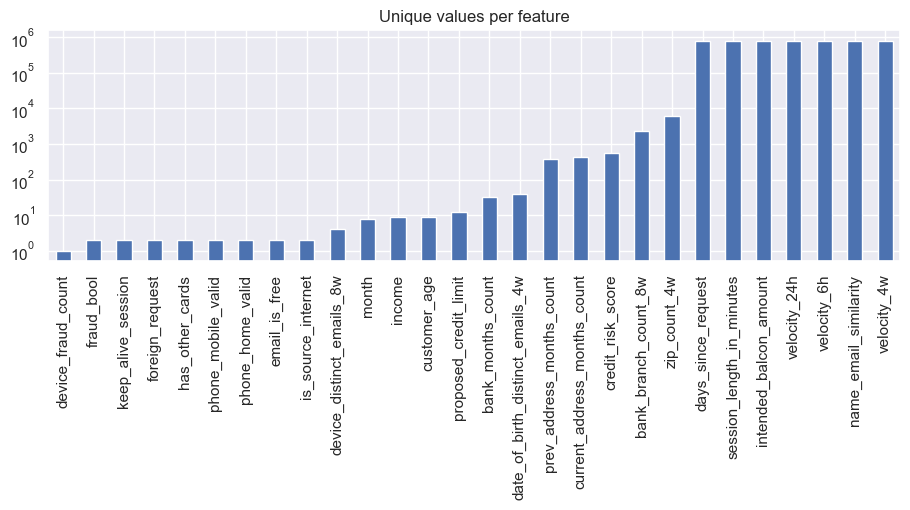

In [104]:
uniqueVal.plot.bar(logy=True, figsize=(11, 3), title="Unique values per feature")

In [105]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
999995    False
999996    False
999997    False
999998    False
999999    False
Length: 1000000, dtype: bool

In [106]:
df.isna().sum().sort_values(ascending=False)

housing_status                      200794
zip_count_4w                        200770
bank_months_count                   200712
payment_type                        200606
employment_status                   200517
fraud_bool                          200497
email_is_free                       200451
date_of_birth_distinct_emails_4w    200399
income                              200386
velocity_24h                        200328
credit_risk_score                   200311
phone_home_valid                    200271
session_length_in_minutes           200134
current_address_months_count        200051
month                               200034
intended_balcon_amount              200013
velocity_6h                         199992
name_email_similarity               199979
device_os                           199888
device_distinct_emails_8w           199863
phone_mobile_valid                  199759
is_source_internet                  199724
bank_branch_count_8w                199650
keep_alive_

In [107]:
# drop edilebilecek column'lar

# bank_months_count
# current_address_months_count
# prev_address_months_count

df.drop("current_address_months_count", axis=1, inplace=True)
df.drop("bank_months_count", axis=1, inplace=True)
df.drop("prev_address_months_count", axis=1, inplace=True)

In [108]:
missPercent = df.isna().sum().sort_values(ascending=False) / len(df)
missPercent[missPercent != 0]

housing_status                      0.200794
zip_count_4w                        0.200770
payment_type                        0.200606
employment_status                   0.200517
fraud_bool                          0.200497
email_is_free                       0.200451
date_of_birth_distinct_emails_4w    0.200399
income                              0.200386
velocity_24h                        0.200328
credit_risk_score                   0.200311
phone_home_valid                    0.200271
session_length_in_minutes           0.200134
month                               0.200034
intended_balcon_amount              0.200013
velocity_6h                         0.199992
name_email_similarity               0.199979
device_os                           0.199888
device_distinct_emails_8w           0.199863
phone_mobile_valid                  0.199759
is_source_internet                  0.199724
bank_branch_count_8w                0.199650
keep_alive_session                  0.199583
velocity_4

### Part 3. Visual analysis of the features

- a) Explain the distribution of some important features in your dataset using visualizations.
- b) Perfrom all additional EDA steps that you consider necessary.


array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

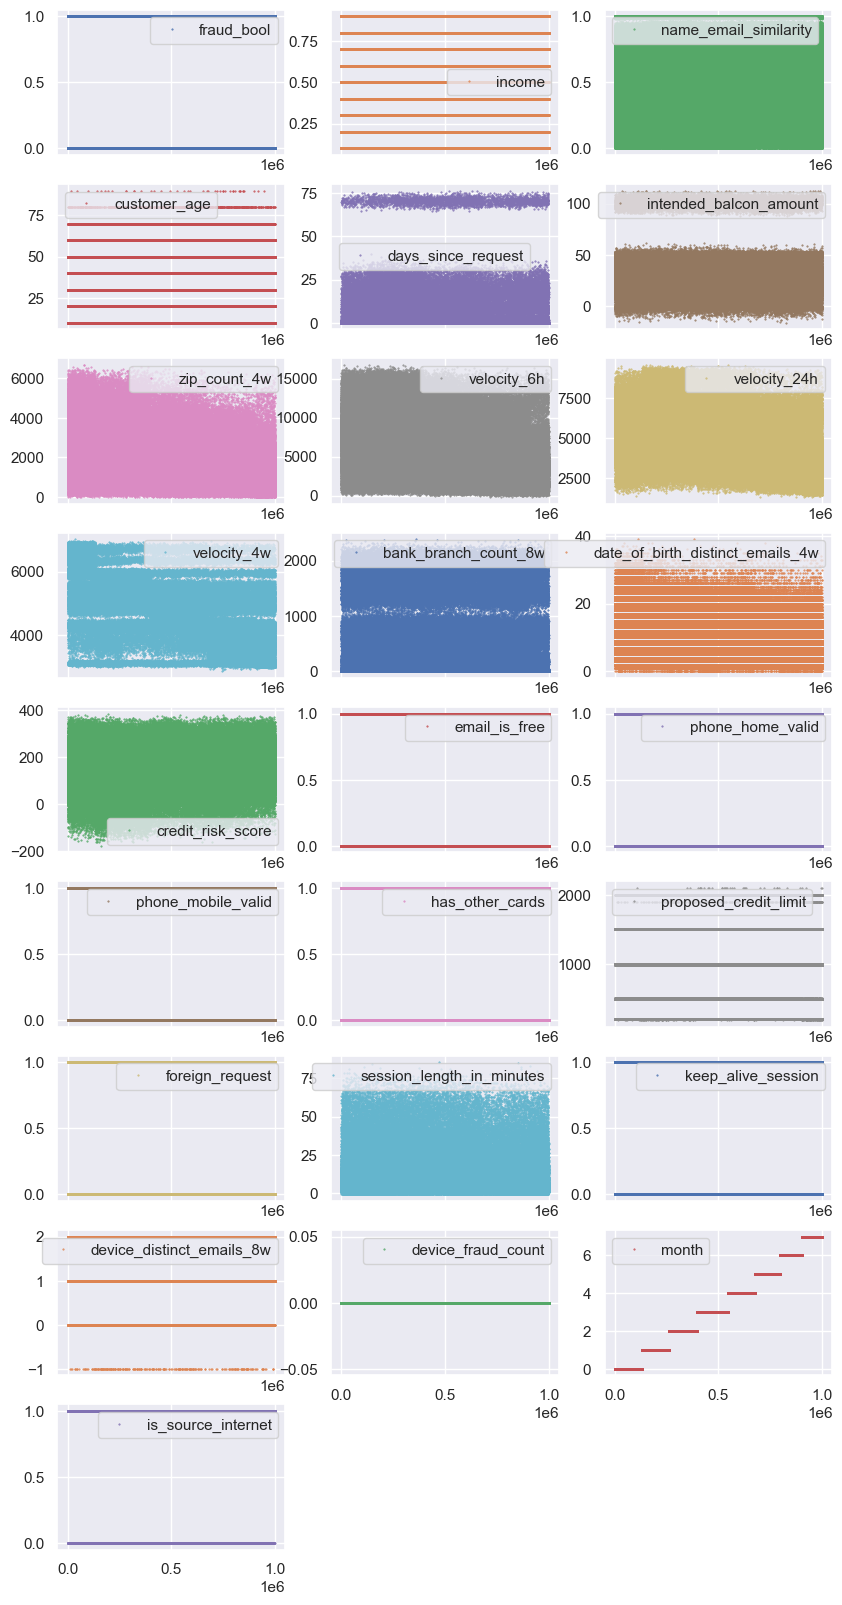

In [109]:
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 3), figsize=(10, 20), markersize=1)

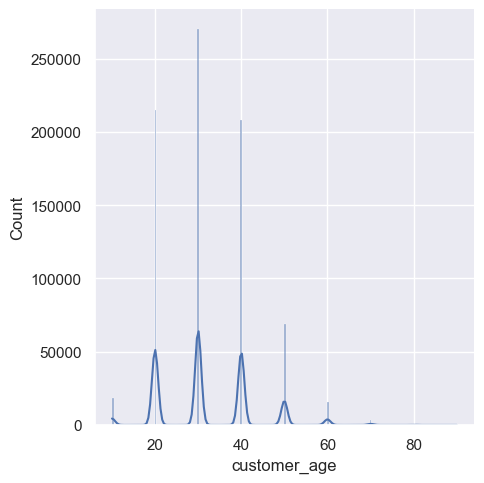

In [110]:
sns.displot(data=df, x='customer_age', kde=True) #datasetteki yaş dağılımını gösteren barplot

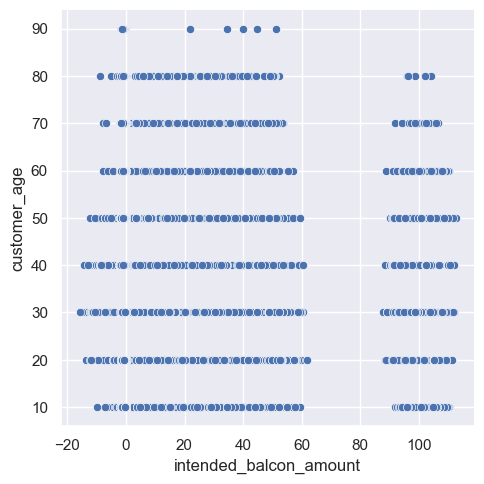

In [111]:
sns.relplot(data=df, x='intended_balcon_amount', y='customer_age', kind='scatter')

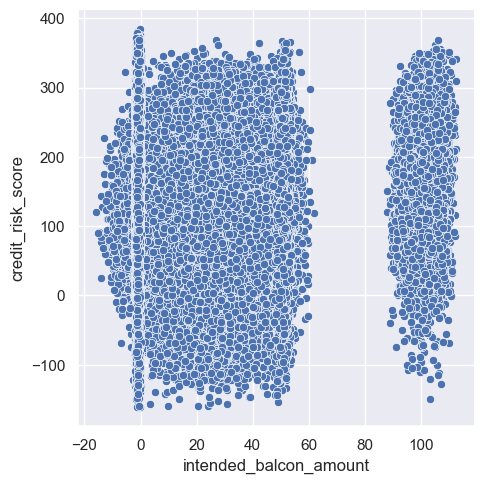

In [112]:
sns.relplot(data=df, x='intended_balcon_amount', y='credit_risk_score', kind='scatter')

In [ ]:
sns.relplot(data=df, x='credit_risk_score', y='customer_age', kind='scatter', hue='is_source_internet')

In [ ]:
sns.displot(data=df,
            x='intended_balcon_amount',hue='month')

In [ ]:
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)

In [ ]:
sns.violinplot(data=df, x="payment_type", y="credit_risk_score",)

In [ ]:
sns.pairplot(data=df)

### Part 4. Data pre-processing

- a) Check whether there are any outliers? Remove outliers (if there are any) in your data.
- b) How many columns include missing values?
- c) Explain your method to handle each of those missing value and explain Why you chose this methods?
- d) Handling missing values via appropriate approaches
- e) Perfrom all additional pre-processing steps that you consider necessary.


In [ ]:
# burada missing valulerı dolduracağız ama bool olan datalar 0.5 gibi değerlere gitmemesi için onları çıkarıyoruz.
PREnumericNum = df.select_dtypes(include=np.number)
PREnumericColumns = PREnumericNum.columns
boolColumns = [
    "fraud_bool",
    "email_is_free",
    "phone_home_valid",
    "phone_mobile_valid",
    "has_other_cards",
    "foreign_request",
    "keep_alive_session",
    "is_source_internet",
]
numericColumnsSet = set(PREnumericColumns) - set(boolColumns)
numericColumns = list(numericColumnsSet)

In [ ]:
df[numericColumns] = df[numericColumns].interpolate(
    method="linear", limit_direction="forward"
)

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

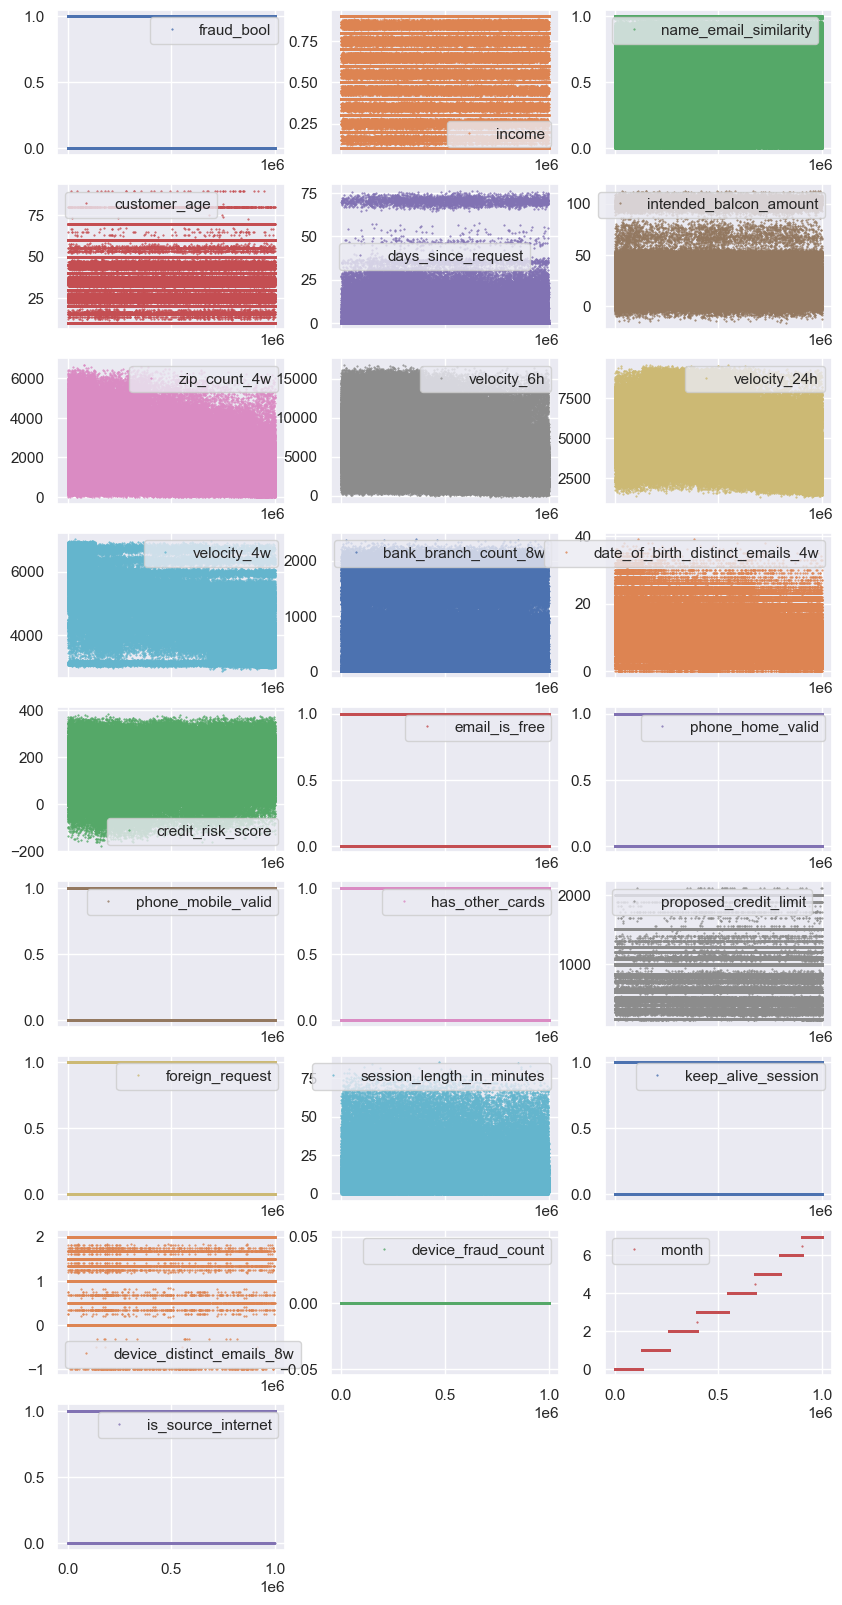

In [ ]:
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 3), figsize=(10, 20), markersize=1)

In [ ]:
# 4 tane obje olan ve bool olan verilerimiz hariç hepsindeki boşlukları doldurmuş olduk

In [ ]:
#bool olan verileri doldurmak için train datası oluşturup bunu kullanacağız
from sklearn.ensemble import HistGradientBoostingClassifier

# Eksik olmayan verilerle model eğitimi
x_train_features = numericColumns
y_train_features = boolColumns

for boolColumn in y_train_features: 
    train_df = df.dropna()
    X_train = train_df[x_train_features]
    y_train = train_df[boolColumn]
    model = HistGradientBoostingClassifier()
    model.fit(X_train, y_train)

    # Eksik verileri tahmin edelim
    missing_data = df[df[boolColumn].isnull()]
    X_missing = missing_data[x_train_features]
    predicted_onay = model.predict(X_missing)
    df.loc[df[boolColumn].isnull(), boolColumn] = predicted_onay

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

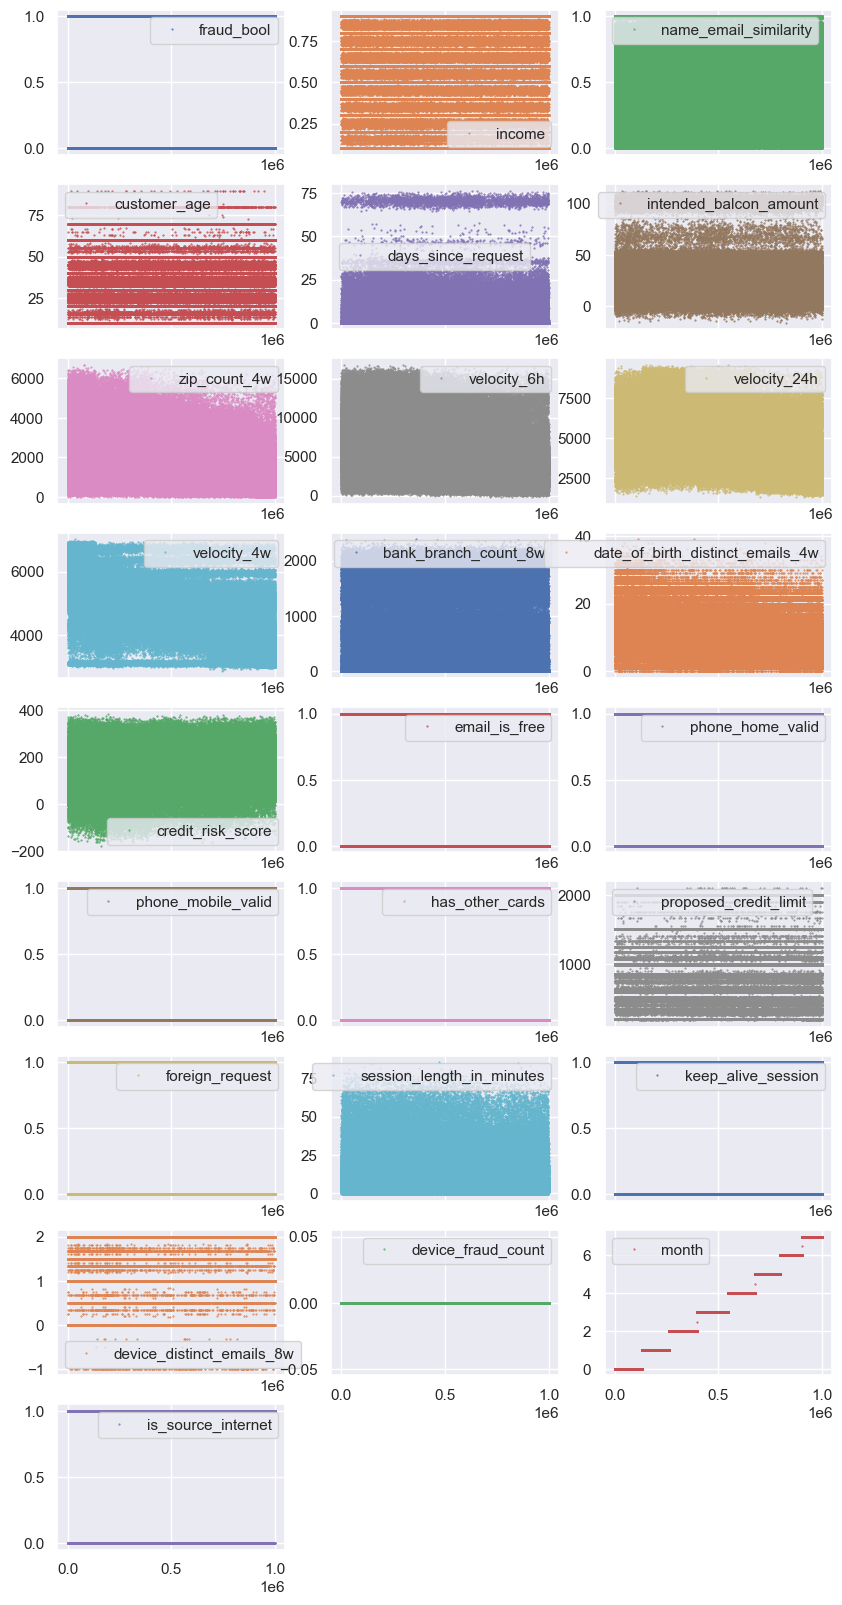

In [ ]:
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 3), figsize=(10, 20), markersize=1)

In [ ]:
missPercent = df.isna().sum().sort_values(ascending=False) / len(df)
missPercent[missPercent != 0]

housing_status               0.200794
payment_type                 0.200606
employment_status            0.200517
device_os                    0.199888
days_since_request           0.000001
device_distinct_emails_8w    0.000001
bank_branch_count_8w         0.000001
dtype: float64

### Part 5. Feature engineering and description

- a) Explain if you need to apply any kind of transformations and/or encoding and perform them.
- b) Determine which features are the most valuable and whether you need to create a new feature?
- c) Select (i.e., filter) or create features that make machine learning algorithms work.
- d) Apply dimensionality reduction i.e. PCA to your data.
- e) Perfrom all additional feature engineering steps that you consider necessary.


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming 'df' is your DataFrame and 'category_feature' is your categorical column
# Normalize a numeric feature
scaler = StandardScaler()
df['income'] = scaler.fit_transform(df[['income']])

# One-hot encode a categorical feature
encoder = ColumnTransformer(transformers=[('cat', OneHotEncoder(), ['housing_status'])], remainder='passthrough')
df_encoded = encoder.fit_transform(df)
df_encoded = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out())


Dönüşümler, özellikle giriş verilerinin ölçeğine duyarlı olan destek vektör makineleri (SVM) veya k-en yakın komşular (KNN) gibi algoritmalar için sayısal verilerin normalleştirilmesini veya standartlaştırılmasını içerebilir. Günlük dönüşümleri, veri dağıtımlarındaki çarpıklığın azaltılmasına yardımcı olabilir.

Kodlama, kategorik değişkenlerin makine öğrenimi algoritmalarına sağlanabilecek bir formata dönüştürülmesini içerir. Yaygın yöntemler şunları içerir:

Tek Sıcak Kodlama: Her kategorik değeri yeni bir kategorik sütuna dönüştürür ve 1 veya 0 (Doğru/Yanlış) atar. İç sıralaması olmayan nominal veriler için kullanışlıdır.
Etiket Kodlaması: Her değeri bir sayıya dönüştürür. Sıranın önemli olduğu sıralı veriler için uygundur.
Python'un pandalarını ve scikit-learn'i kullanan örnek:

In [ ]:
df_encoded

,cat__housing_status_BA,cat__housing_status_BB,cat__housing_status_BC,cat__housing_status_BD,cat__housing_status_BE,cat__housing_status_BF,cat__housing_status_BG,cat__housing_status_nan,remainder__fraud_bool,remainder__income,...,remainder__has_other_cards,remainder__proposed_credit_limit,remainder__foreign_request,remainder__session_length_in_minutes,remainder__device_os,remainder__keep_alive_session,remainder__device_distinct_emails_8w,remainder__device_fraud_count,remainder__month,remainder__is_source_internet
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.227117,...,0.0,200.0,0.0,6.150317,NaN,0.0,NaN,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.865329,...,0.0,1500.0,0.0,4.521952,windows,1.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.503542,...,0.0,200.0,0.0,8.361707,NaN,1.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.227117,...,0.0,1500.0,0.0,6.349885,other,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.503542,...,0.0,1500.0,0.0,4.338063,other,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.227117,...,0.0,200.0,0.0,13.911821,NaN,1.0,1.0,0.0,7.0,1.0
999996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.227117,...,0.0,200.0,0.0,26.319296,linux,0.0,1.0,0.0,7.0,1.0
999997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.141754,...,0.0,200.0,0.0,1.614444,linux,1.0,1.0,0.0,7.0,1.0
999998,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.865329,...,0.0,200.0,0.0,3.682591,linux,0.0,1.0,0.0,7.0,1.0


Principal Component Analysis (PCA) is a technique used to reduce the dimensions of a dataset by transforming to a new set of features (principal components) that retain most of the original dataset's variability.

In [ ]:
scaler = StandardScaler()
df['income'] = scaler.fit_transform(df[['income']])

# One-hot encode a categorical feature
encoder = ColumnTransformer(transformers=[('cat', OneHotEncoder(), ['employment_status'])], remainder='passthrough')
df_encoded = encoder.fit_transform(df)
df_encoded = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out())

ValueError: could not convert string to float: 'velocity_24h'

In [ ]:
principal_components